# Homework 1-Exercise 1

In [2]:
'''
Name：Martin ECHAVARRIA GALINDO
Department: Chemical and Biological Engineering
Program: PhD in Bioengineering
Student ID: 21000651
'''

'\nName：Martin ECHAVARRIA GALINDO\nDepartment: Chemical and Biological Engineering\nProgram: PhD in Bioengineering\nStudent ID: 21000651\n'

## A) Set up data matrix

In [3]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt

url= 'https://hastie.su.domains/ElemStatLearn/datasets/zip.digits/train.5'
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')))
data = np.array(c,dtype='float32');
data.shape

(555, 256)

## B) Compute the sample mean and form the centered sample

In [4]:
mean_data=np.mean(data,axis=0)
print(mean_data.shape)


def centering_matrix(n):
    I = np.identity(n)
    ones = np.ones((n, n)) / n
    return I - ones



centered_sample=np.dot(data.T,centering_matrix(555))
print(centered_sample.shape)

(256,)
(256, 555)


## C) Compute top k SVD 

(256, 256)
(256, 256)
(555, 555)
Top 5 SVD:


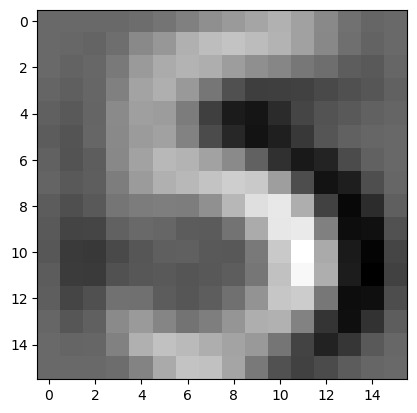

In [5]:
from scipy.linalg import svd

U, S_val, V_transpose = svd(centered_sample)
S=np.diag(S_val)
print(U.shape)
print(S.shape)
print(V_transpose.shape)

print('Top 5 SVD:')
img_approx = U[:, :5] @ S[0:5, :5] @ V_transpose[:5, :]
img1 = np.reshape(img_approx[:,200],(16,16));
imgshow = plt.imshow(img1,cmap='gray')


Top 10 SVD:


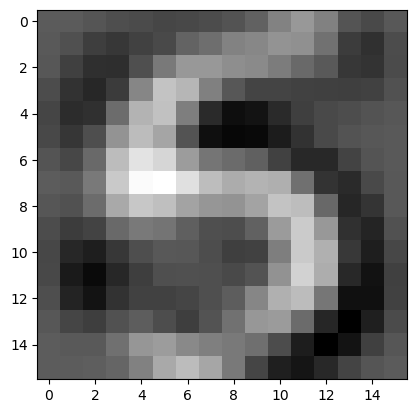

In [6]:
print('Top 10 SVD:')
img_approx = U[:, :10] @ S[0:10, :10] @ V_transpose[:10, :]
img2 = np.reshape(img_approx[:,200],(16,16));
imgshow = plt.imshow(img2,cmap='gray')

Top 50 SVD:


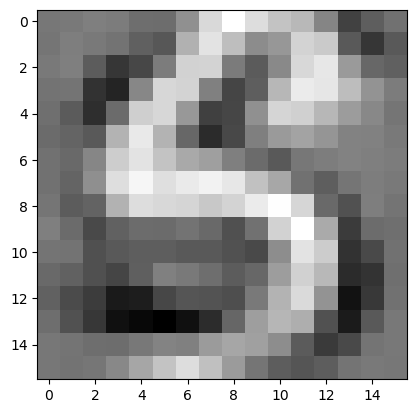

In [7]:
print('Top 50 SVD:')
img_approx = U[:, :50] @ S[0:50, :50] @ V_transpose[:50, :]
img2 = np.reshape(img_approx[:,200],(16,16));
imgshow = plt.imshow(img2,cmap='gray')

Top 200 SVD:


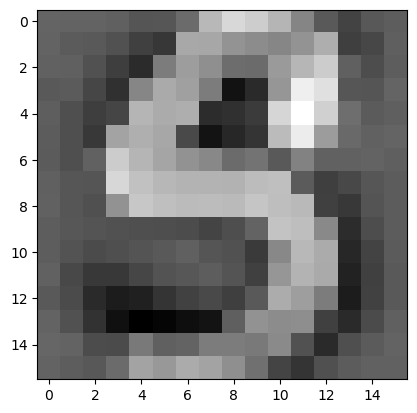

In [8]:
print('Top 200 SVD:')
img_approx = U[:, :200] @ S[0:200, :200] @ V_transpose[:200, :]
img2 = np.reshape(img_approx[:,200],(16,16));
imgshow = plt.imshow(img2,cmap='gray')

Original Photo


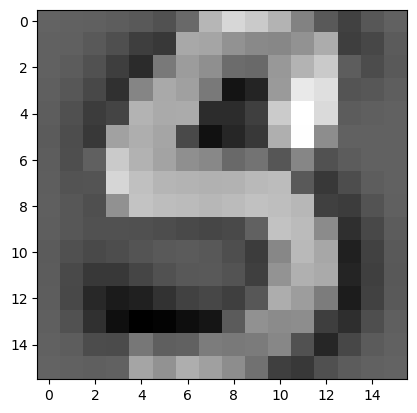

In [11]:
print('Original Photo')
img2 = np.reshape(centered_sample[:,200],(16,16));
imgshow = plt.imshow(img2,cmap='gray')

## D) Plot eigenvalue curve 

C:\Users\megaa\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


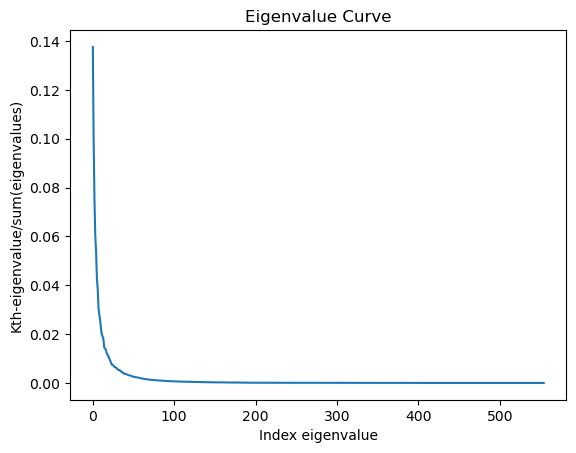

In [13]:
cov_matrix = np.cov(centered_sample, rowvar=False)


eigenvalues, _ = np.linalg.eig(cov_matrix)
total_eigenvalues=np.sum(eigenvalues)


sorted_eigenvalues = np.sort(eigenvalues)[::-1]
sorted_eigenvalues=sorted_eigenvalues/total_eigenvalues


plt.plot(sorted_eigenvalues)
plt.xlabel('Index eigenvalue')
plt.ylabel('Kth-eigenvalue/sum(eigenvalues)')
plt.title('Eigenvalue Curve')
plt.show()

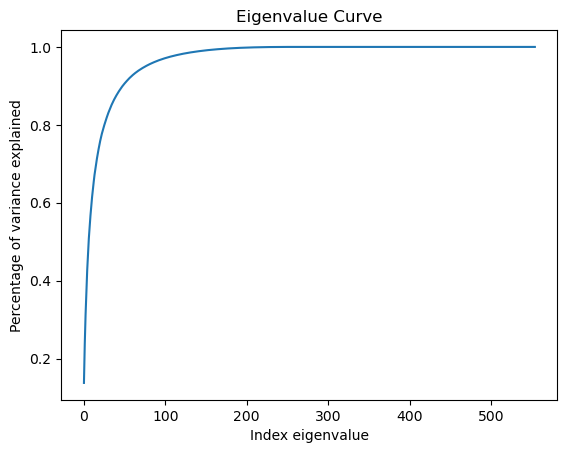

In [14]:
cumulative_sum=np.cumsum(np.sort(eigenvalues)[::-1])
cumulative_eigenvalues=cumulative_sum/total_eigenvalues


plt.plot(cumulative_eigenvalues)
plt.xlabel('Index eigenvalue')
plt.ylabel('Percentage of variance explained')
plt.title('Eigenvalue Curve')
plt.show()

##  E) Use imshow to visualize the mean and top-k principle components as left singular vectors U = [u1, . . . , uk]

(256,)


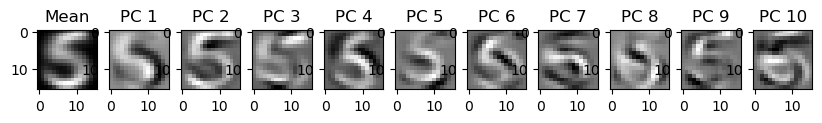

In [15]:
k=10
print(mean_data.shape)
fig, axs = plt.subplots(1, k+1, figsize=(10, 10))

axs[0].imshow(mean_data.reshape(16, 16), cmap='gray')
axs[0].set_title('Mean')

for i in range(10):
    axs[i+1].imshow(U[:, i].reshape(16, 16), cmap='gray')
    axs[i+1].set_title(f'PC {i+1}')

plt.show()

## F)  For k = 1, order the images (xi) (i = 1, . . . , n) according to the top first right singular vector, v1, in an ascending order of v1(i)

In [16]:

v1 = V_transpose[0, :]


sorted_indices = np.argsort(v1)
sorted_data = data[sorted_indices]

print("Sorted data shape:", sorted_data.shape)

Sorted data shape: (555, 256)


## G) For k = 2, scatter plot (v1, v2) and select a grid on such a plane to show those images on the grid 

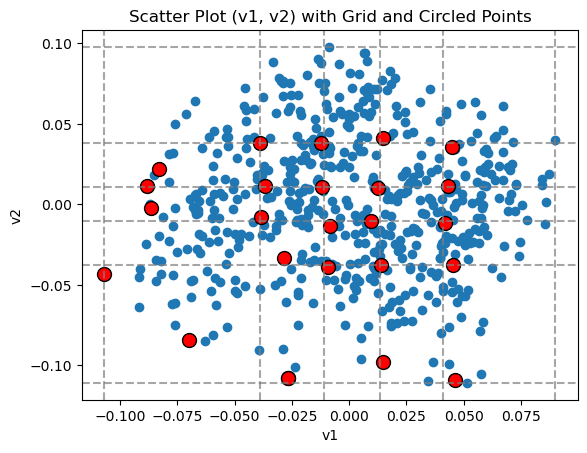

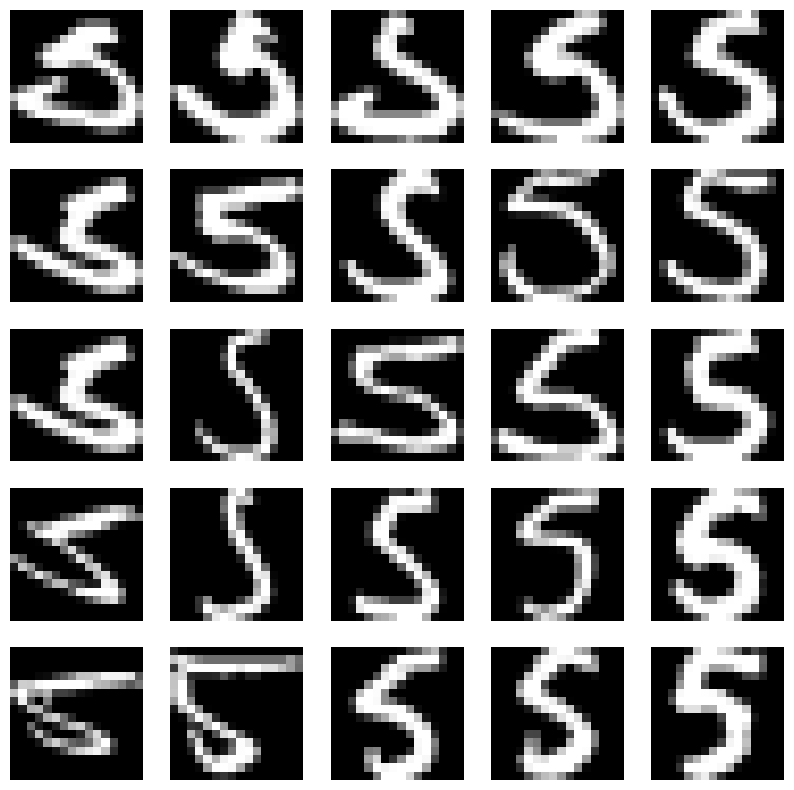

In [17]:
import matplotlib.gridspec as gridspec

v1, v2 = V_transpose[:2, :]
plt.scatter(v1, v2)

grid_size = (5, 5)  
quantiles_v1 = np.linspace(0, 1, grid_size[0] + 1)
quantiles_v2 = np.linspace(0, 1, grid_size[1] + 1)
grid_v1 = np.quantile(v1, quantiles_v1)
grid_v2 = np.quantile(v2, quantiles_v2)


for i in range(grid_size[0] + 1):
    plt.axvline(x=grid_v1[i], linestyle='--', color='gray', alpha=0.7)
for j in range(grid_size[1] + 1):
    plt.axhline(y=grid_v2[j], linestyle='--', color='gray', alpha=0.7)


selected_indices = np.empty(grid_size, dtype=int)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        min_distance = np.inf
        min_index = -1
        for index in range(len(data)):
            distance = (v1[index] - grid_v1[i])**2 + (v2[index] - grid_v2[j])**2
            if distance < min_distance:
                min_distance = distance
                min_index = index
        selected_indices[i, j] = min_index
        plt.scatter(v1[min_index], v2[min_index], c='red', marker='o', s=100, linewidths=1, edgecolors='black')

plt.xlabel('v1')
plt.ylabel('v2')
plt.title('Scatter Plot (v1, v2) with Grid and Circled Points')
plt.show()


fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(*grid_size)

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        img = data[selected_indices[i, j]].reshape(16, 16) 
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(img, cmap='gray')
        ax.axis('off')

plt.show()

## H) You may try the parallel analysis with permutation test to see how many significant principle components you will obtain.
 

In [22]:
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

pca = PCA().fit(centered_sample)
eigenvalues = pca.explained_variance_

n_permutations = 100
random_eigenvalues = np.zeros((n_permutations, 256))

for i in range(n_permutations):
    permuted_data = np.array([shuffle(centered_sample[:, j]) for j in range(centered_sample.shape[1])]).T
    
    pca_permuted = PCA().fit(permuted_data)
    random_eigenvalues[i, :] = pca_permuted.explained_variance_

p_values = np.array([np.mean(random_eigenvalues[:, i] >= eigenvalues[i]) for i in range(len(eigenvalues))])

p_value_threshold = 0.05

significant_eigenvalues = eigenvalues[p_values < p_value_threshold]

print(f"Number eigenvalues: ", len(significant_eigenvalues))

Number eigenvalues:  24
